2023-05-23 11:06:25.273899: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Number of GPUs available : 0
|                   Data Group 1                     |
______________________________________________________
|  EBN0[DB]  |  SER(ZF)  |  SER(LMMSE)  |  SER(DIP)  |
______________________________________________________
            
10.00000000    0.13327026    0.09985352    0.09985352   

______________________________________________________
            
20.00000000    0.01443481    0.01132202    0.01132202   

______________________________________________________
            
30.00000000    0.00186157    0.00164795    0.00164795   

______________________________________________________
Done


UnboundLocalError: local variable 'sers_zf_mean' referenced before assignment

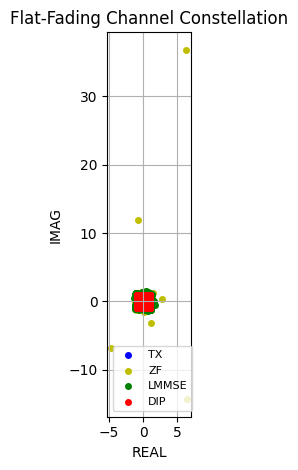

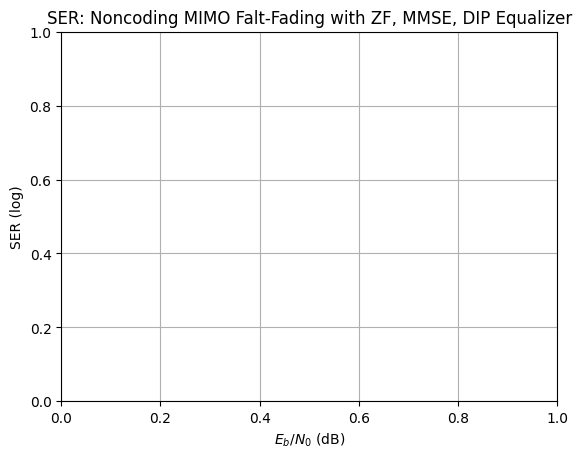

In [1]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow.keras import Model
from UncodedSystemFlatFading import UncodedSystemFlatFading

Block_Length = 512         # Block Length (k):512
NUM_BITS_PER_SYMBOL = 4    # Mapping: 16QAM
CONSTELLATION_TYPE = "qam" #
DEMAPPING_METHOD = "app"   # Demapping Method: "app"
NUM_TX_ANT = 4             # Transmit Antennas: 4
NUM_RX_ANT = 4             # Receive Antennas: 4

NUM_DATA_GROUP = 1         # Number of Data Group: 5
BATCH_SIZE = 64            # Number of Parallelly Processed Batches: 64
EBN0_DB_MIN = 10.0          # Minimum Eb/N0 (dB): -5
EBN0_DB_MAX = 30.0         # Maximum Eb/N0 (dB): 20
NUM_EBN0_POINTS = 3        # EBNO Points: 11

model_uncoded_ff = UncodedSystemFlatFading(Block_Length, 
                                           NUM_BITS_PER_SYMBOL,
                                           CONSTELLATION_TYPE,
                                           DEMAPPING_METHOD,
                                           NUM_TX_ANT,
                                           NUM_RX_ANT)
model_uncoded_ff(NUM_DATA_GROUP, 
                 BATCH_SIZE, 
                 EBN0_DB_MIN, 
                 EBN0_DB_MAX, 
                 NUM_EBN0_POINTS);